# Background Information

#### Main Target

From the consumer's perspective to evaluate automobiles. This analysis will focus on the price and safety performance of automobiles. To see whether a consumer should purchase a certain model given the price and the safety performance.

#### Stakeholder
Potential buyer in the automobile market who values the price and safety performance.

#### Objective
Analysis of different car models from various automobile makers in terms of "Price" and "Safety Performance".

#### Dataset
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources:
1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. **Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.**

The third factor is the relative average loss payment per insured vehicle year. **This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.**


# Environment set-up and understand the data

In [1]:
# input libraries

import numpy as np 
import pandas as pd 
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/automobile-dataset/Automobile_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('ticks')
sns.set(rc={'figure.figsize':(12,9)})

In [3]:
automobile_data = pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv") 

In [4]:
automobile_data.shape

(205, 26)

In [5]:
automobile_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### Notes:

Automobile Dataset includes 205 observations.

The columns are in different data types:
- **String**:normalized-losses, make, fuel-type. aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type,num-of-cylinders, fuel-system, bore, stroke, horsepower, peak-rpm, price
- **Integer**: symboling,  curb-weight, engine-size, city-mpg and highway-mpg
- **Float**: wheel-base, length, width, height, compression-ratio  
<br>

# Data Prepocessing

### Any missing or duplicated data

In [8]:
# Turn all "?" into nan to view the missing values easier.
automobile_data.replace(to_replace = "?",value = np.nan,inplace=True)

In [9]:
automobile_data.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

<AxesSubplot:>

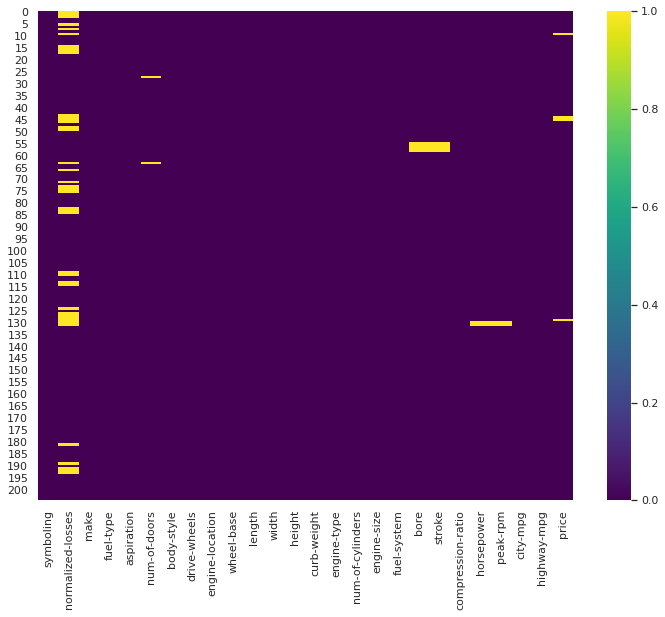

In [10]:
# visualize the number of missing values
missing_values = automobile_data.isna()
sns.heatmap(data = missing_values, cmap='viridis')

In [11]:
automobile_data.duplicated().any()

False

#### Notes:

- normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price columns contain missing values.
- normalized-losses contain the most missing values in number.
- no duplicated data.


### Deal with missing data, data type

In [12]:
# impute data to num-of-doors
nl_mean = automobile_data["normalized-losses"].astype(float).mean()
automobile_data["normalized-losses"] = automobile_data["normalized-losses"].fillna(nl_mean)

# impute data to num-of-doors
automobile_data["num-of-doors"] = automobile_data["num-of-doors"].fillna("four")

# impute data to bore
bore_mean = automobile_data["bore"].astype(float).mean()
automobile_data["bore"] = automobile_data["bore"].fillna(bore_mean).astype(float)

# impute data to stroke
stroke_mean = automobile_data["stroke"].astype(float).mean()
automobile_data["stroke"] = automobile_data["stroke"].fillna(stroke_mean).astype(float)

# impute data to horsepower
hp_mean = automobile_data["horsepower"].astype(float).mean()
automobile_data["horsepower"] = automobile_data["horsepower"].fillna(hp_mean).astype(int)

# impute data to peak-rpm
prpm_mean = automobile_data["peak-rpm"].astype(float).mean()
automobile_data["peak-rpm"] = automobile_data["peak-rpm"].fillna(prpm_mean).astype(int)

# impute data to price
price_mean = automobile_data["price"].astype(float).mean()
automobile_data["price"] = automobile_data["price"].fillna(price_mean).astype(int)

print()

<AxesSubplot:>

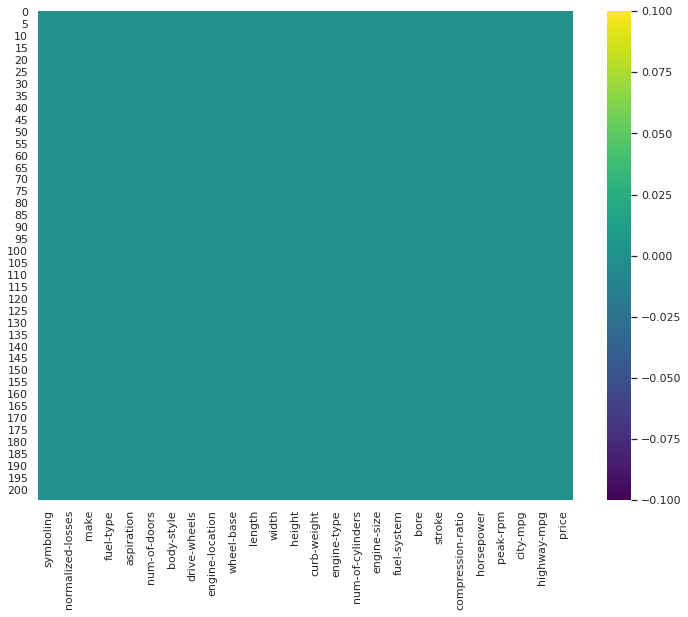

In [13]:
# visualize the number of missing values
missing_values_2 = automobile_data.isna()
sns.heatmap(data = missing_values_2, cmap='viridis')

#### Notes:

- Filled in the missing values with column means, and modified to digit types.

# Univariate Analysis with Visualization

In [14]:
automobile_data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.0,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,52.0,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,122.0,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,41.0,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'mazda'),
  Text(9, 0, 'mercedes-benz'),
  Text(10, 0, 'mercury'),
  Text(11, 0, 'mitsubishi'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'peugot'),
  Text(14, 0, 'plymouth'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'renault'),
  Text(17, 0, 'saab'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'toyota'),
  Text(20, 0, 'volkswagen'),
  Text(21, 0, 'volvo')])

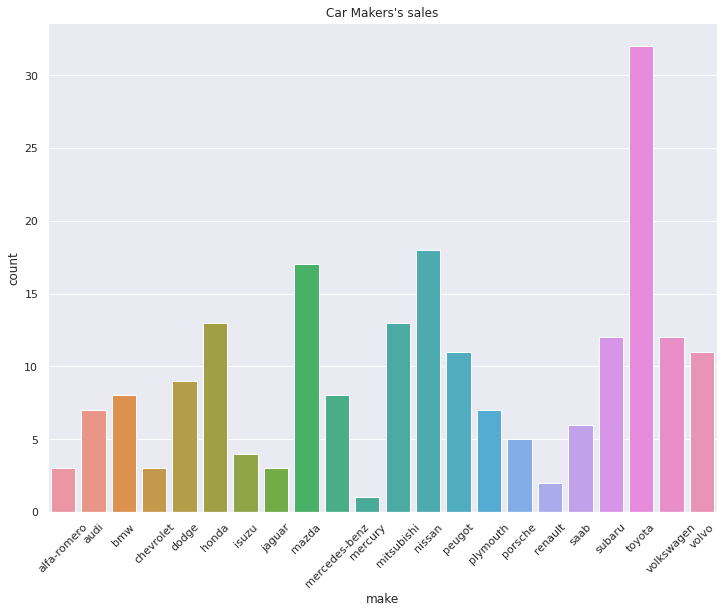

In [15]:
# Producer

sns.countplot(x="make",data=automobile_data)
plt.title("Car Makers's sales")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'The Top 10 Automobile Maker')

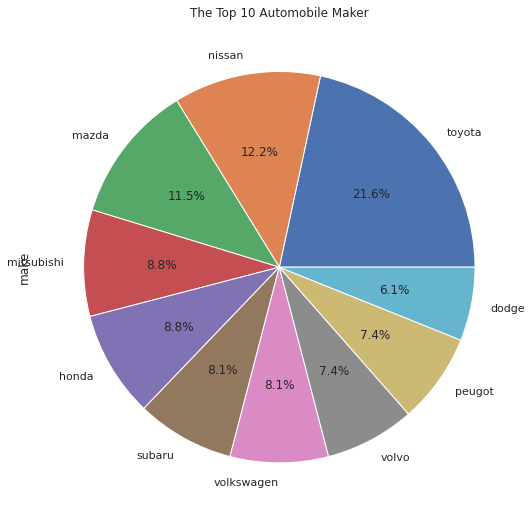

In [16]:
automobile_data["make"].value_counts().head(10).plot(kind="pie",autopct='%1.1f%%')
plt.title("The Top 10 Automobile Maker")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(1, 0, 'nissan'),
  Text(2, 0, 'mazda'),
  Text(3, 0, 'mitsubishi'),
  Text(4, 0, 'honda'),
  Text(5, 0, 'subaru'),
  Text(6, 0, 'volkswagen'),
  Text(7, 0, 'volvo'),
  Text(8, 0, 'peugot'),
  Text(9, 0, 'dodge')])

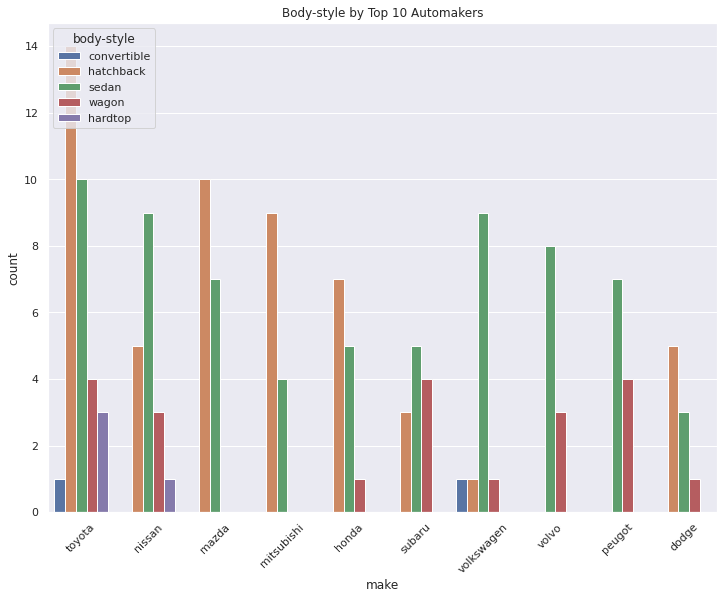

In [17]:
# Producer
sns.countplot(x="make",hue="body-style",data=automobile_data,order=automobile_data["make"].value_counts().iloc[:10].index)
plt.title("Body-style by Top 10 Automakers")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'fuel-system')

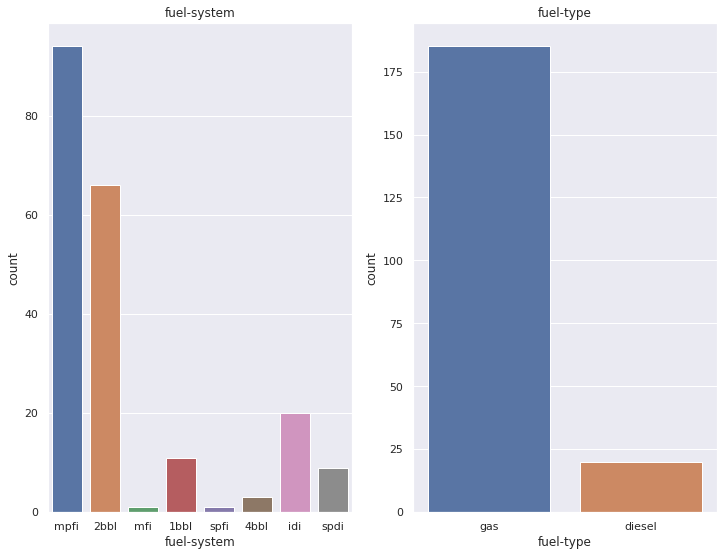

In [18]:
# Fuel related
fig, ax =plt.subplots(1,2)
sns.countplot(x="fuel-type",data=automobile_data,ax=ax[1]).set_title("fuel-type")
sns.countplot(x="fuel-system",data=automobile_data,ax=ax[0]).set_title("fuel-system")


Text(0.5, 1.0, 'engine-type')

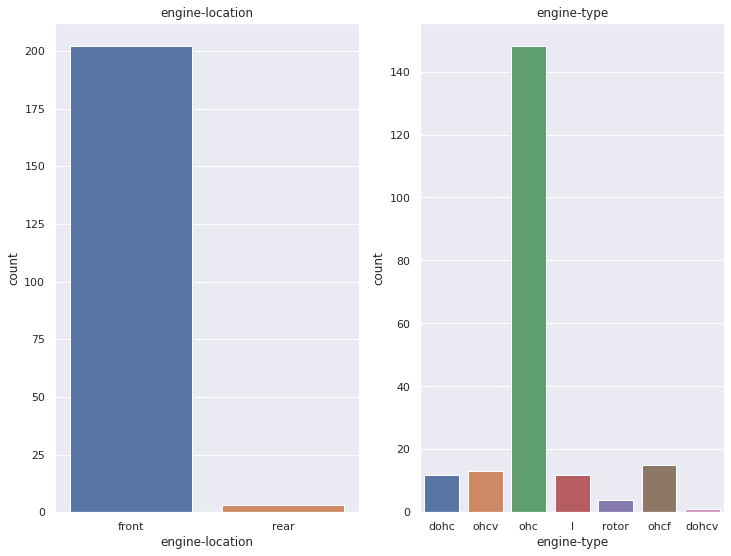

In [19]:
# Engine related
fig, ax =plt.subplots(1,2)

sns.countplot(x="engine-location",data=automobile_data,ax=ax[0]).set_title("engine-location")
sns.countplot(x="engine-type",data=automobile_data,ax=ax[1]).set_title("engine-type")


In [20]:
# who are the few with rear?
automobile_data[automobile_data["engine-location"] == "rear"]["make"]

126    porsche
127    porsche
128    porsche
Name: make, dtype: object

Text(0.5, 1.0, 'num-of-doors')

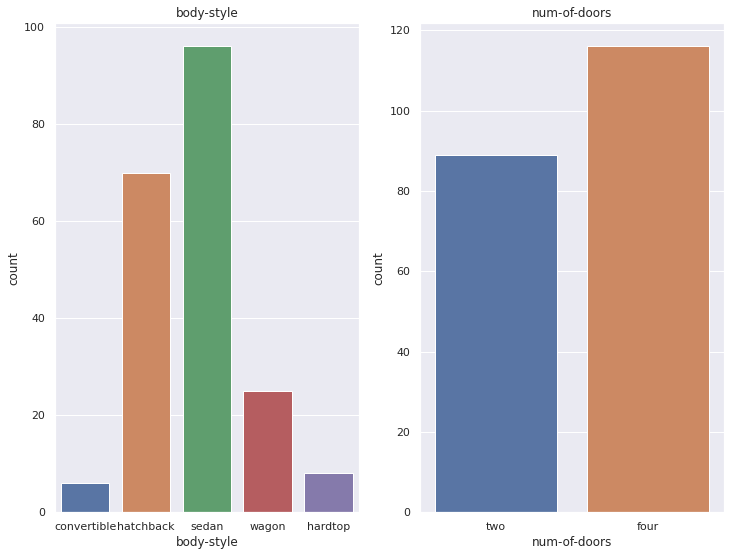

In [21]:
# Appearance related
fig, ax =plt.subplots(1,2)

sns.countplot(x="body-style",data=automobile_data,ax=ax[0]).set_title("body-style")
sns.countplot(x="num-of-doors",data=automobile_data,ax=ax[1]).set_title("num-of-doors")


### Put price into different group and count

In [22]:
automobile_data["price"].isna().value_counts()

False    205
Name: price, dtype: int64

In [23]:
Price_groups = [(automobile_data["price"] < 10000),
               (automobile_data["price"] > 9999) & (automobile_data["price"] <= 19999),
               (automobile_data["price"] > 19999) & (automobile_data["price"] <= 29999),
               (automobile_data["price"] > 29999) & (automobile_data["price"] <= 39999),
               (automobile_data["price"] > 39999)]

labels = ["0-9999", "10000-19999", "20000-29999","30000-39999","40000+"]

automobile_data['price_group'] = np.select(Price_groups, labels)

price_gp = CategoricalDtype(categories=["0-9999", "10000-19999", "20000-29999","30000-39999","40000+"], ordered=True)

automobile_data['price_group']   = automobile_data['price_group'].astype(price_gp)

automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_group
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,10000-19999
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,10000-19999
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,10000-19999
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,10000-19999
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,10000-19999


In [24]:
automobile_data["price_group"].value_counts()

0-9999         98
10000-19999    82
30000-39999    11
20000-29999    11
40000+          3
Name: price_group, dtype: int64

Text(0.5, 1.0, 'Price Group')

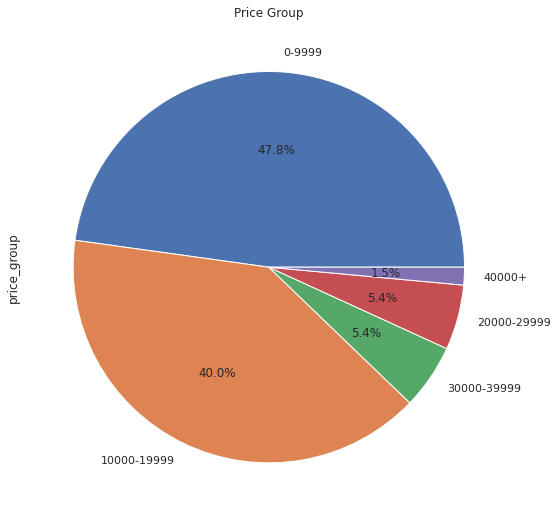

In [25]:
automobile_data["price_group"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Price Group")

#### Notes:

- The top 3 car producers are **Toyota, Nissan, and Mazda**. They are all **Japanese** multinational automakers.
- **Toyota** is the largest suppliers in hatchback, sedan, wagon, and hardtop
- **MPFI** and **2BBL** are the most commonly used fuel system.
- **Gas** is the most common fuel type at that time.
- Almost all engines are located at the front of the car, **only 3 of them have the engine located at the rear, all of 3 are from Porsche**.
- The most common engine type is the **OHC engine**.
- More than **two-thirds** of the cars in data are sedan and hatchback.
- **87.8% of car pricing less than 19,999**, while 47.8% car pricing between 0 to 9,999, and 40% car pricing between 9,999 to 19,999.


# Bivariate Analysis on Price with Visualization

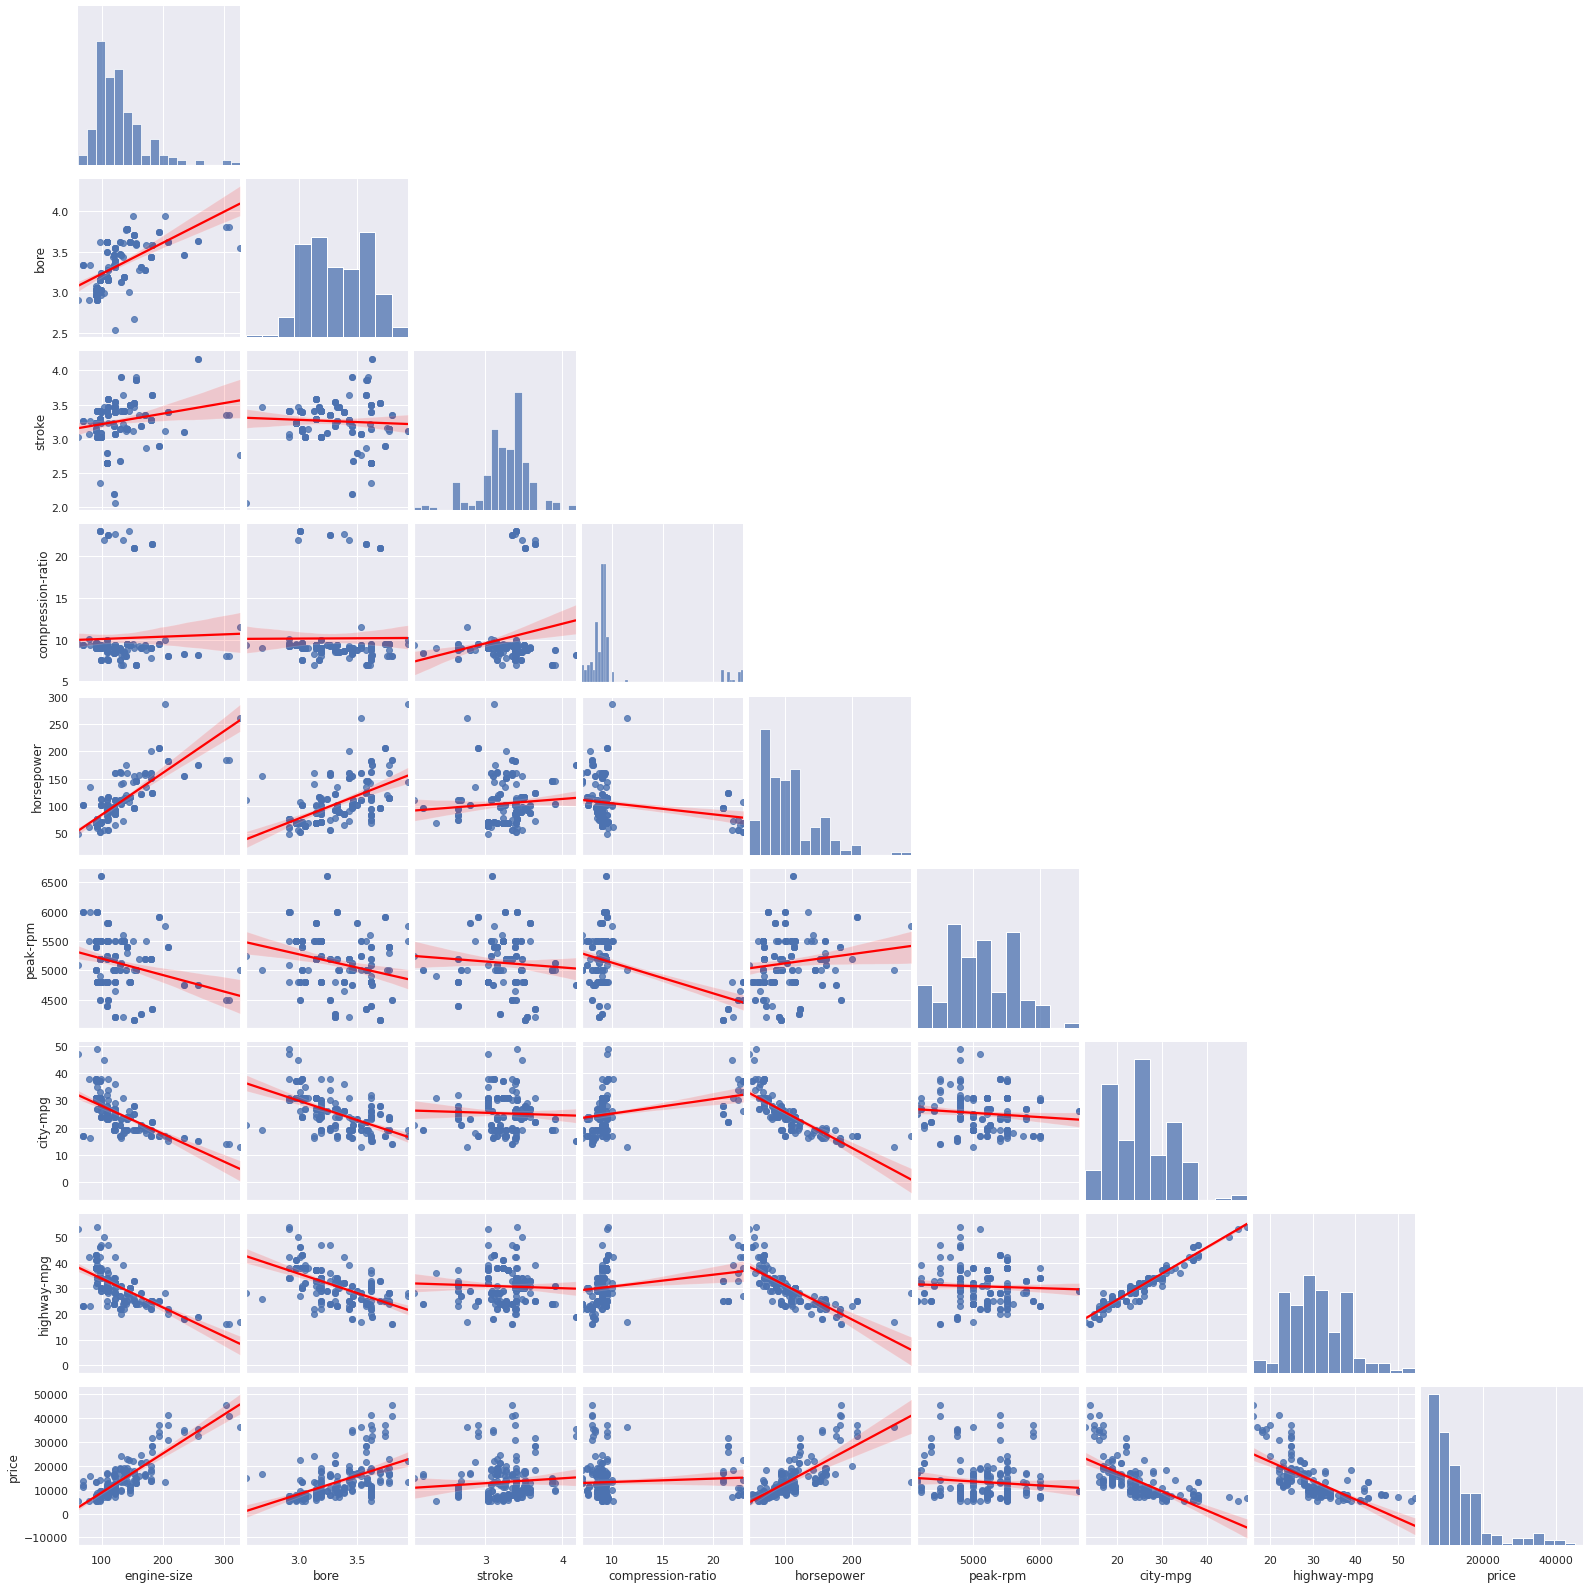

In [26]:
for_check = automobile_data[['normalized-losses','engine-type', 'engine-size', 'fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']]

sns.pairplot(for_check, kind="reg", plot_kws={'line_kws':{'color':'red'}} , corner=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'mazda'),
  Text(9, 0, 'mercedes-benz'),
  Text(10, 0, 'mercury'),
  Text(11, 0, 'mitsubishi'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'peugot'),
  Text(14, 0, 'plymouth'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'renault'),
  Text(17, 0, 'saab'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'toyota'),
  Text(20, 0, 'volkswagen'),
  Text(21, 0, 'volvo')])

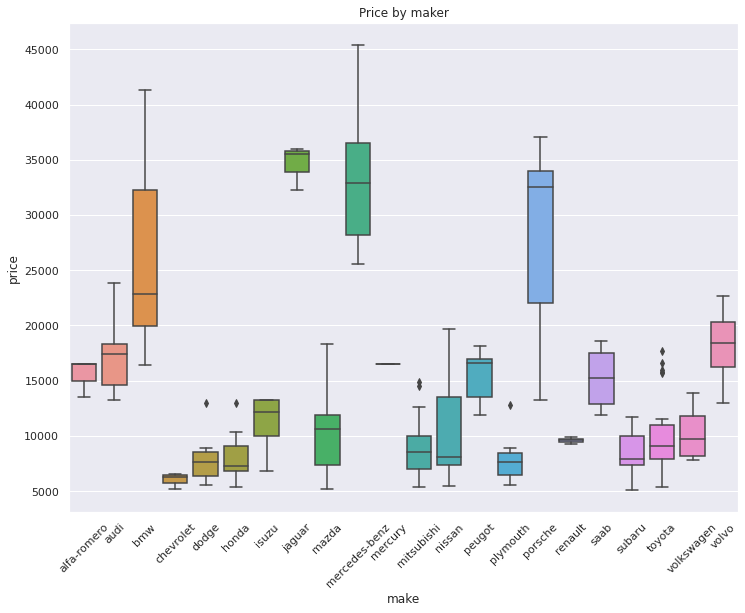

In [27]:
sns.boxplot(x="make",y="price",data=automobile_data).set(title = "Price by maker")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'convertible'),
  Text(1, 0, 'hatchback'),
  Text(2, 0, 'sedan'),
  Text(3, 0, 'wagon'),
  Text(4, 0, 'hardtop')])

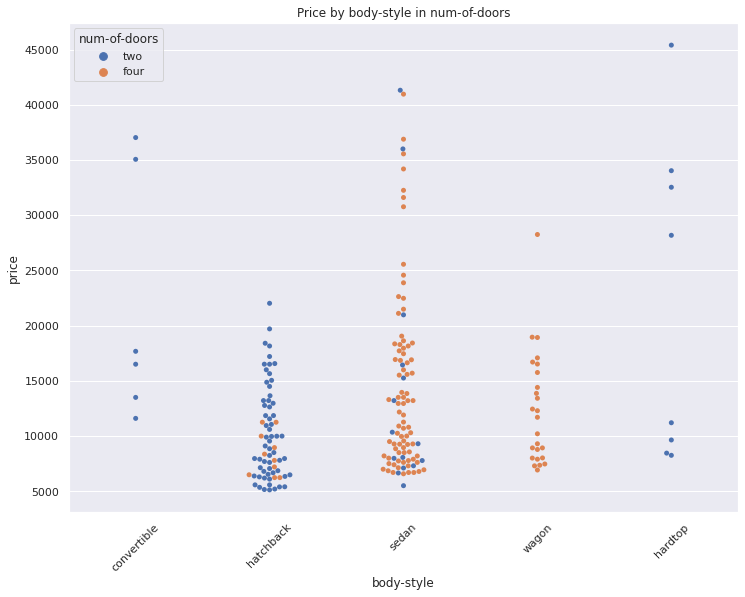

In [28]:
sns.swarmplot(x="body-style",y="price",hue="num-of-doors",data=automobile_data).set(title = "Price by body-style in num-of-doors")
plt.xticks(rotation=45)

[Text(0.5, 1.0, 'Price by normalized-losses in maker')]

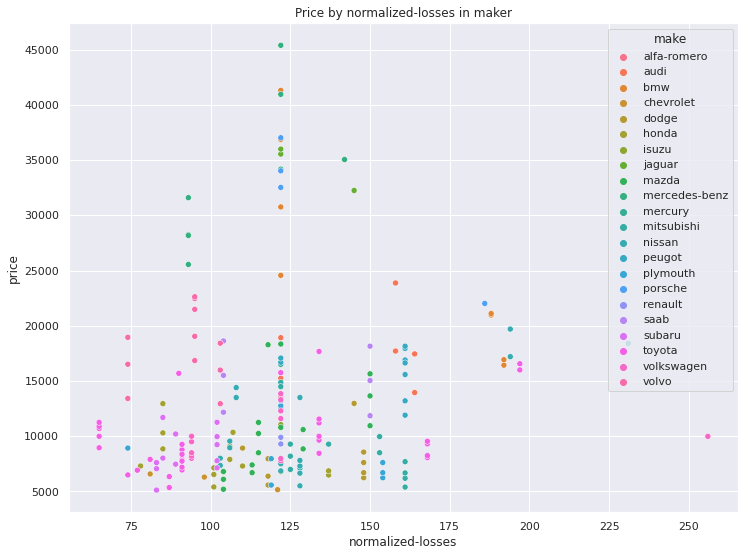

In [29]:
sns.scatterplot(x="normalized-losses",y="price",hue="make",data=automobile_data).set(title = "Price by normalized-losses in maker")

# seems like to many automakers, make the graph hard to read

In [30]:
# plotly version for better checking data
px.scatter(automobile_data, x="normalized-losses", y="price",color='make',title="Price by normalized-losses in Automakers")

[Text(0.5, 1.0, 'Price by normalized-losses in body-style')]

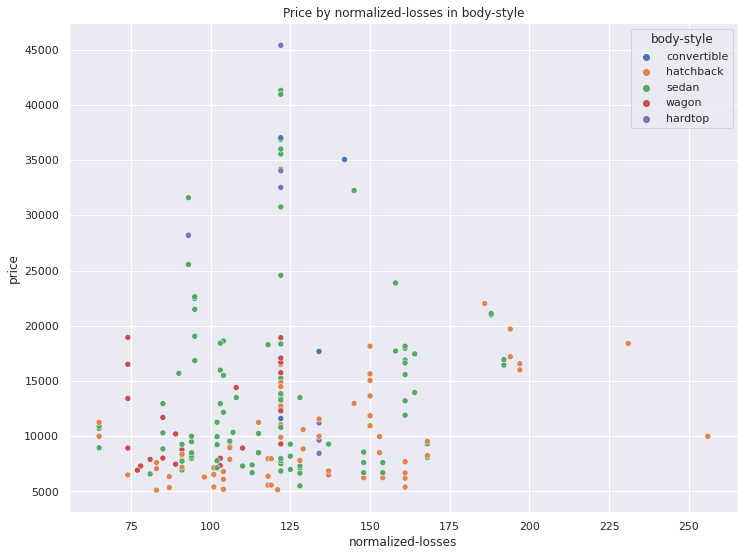

In [31]:
sns.scatterplot(x="normalized-losses",y="price",hue="body-style",data=automobile_data).set(title = "Price by normalized-losses in body-style")

#### Notes:

- Automobile produced by**Mercedes-Benz has the highest listed price**, with a maximum over 45K and over 25K minimum.
- Although the automobiles produced by BMW have a lower mean in listed price when it comes to a comparison with Porsche, BMW has a higher listed price in luxury vehicles.
- **Top 3 selling brands, Toyota, Nissan and Mazda generally sell cars at lower prices.**


# Bivariate Analysis on Safety with Visualization


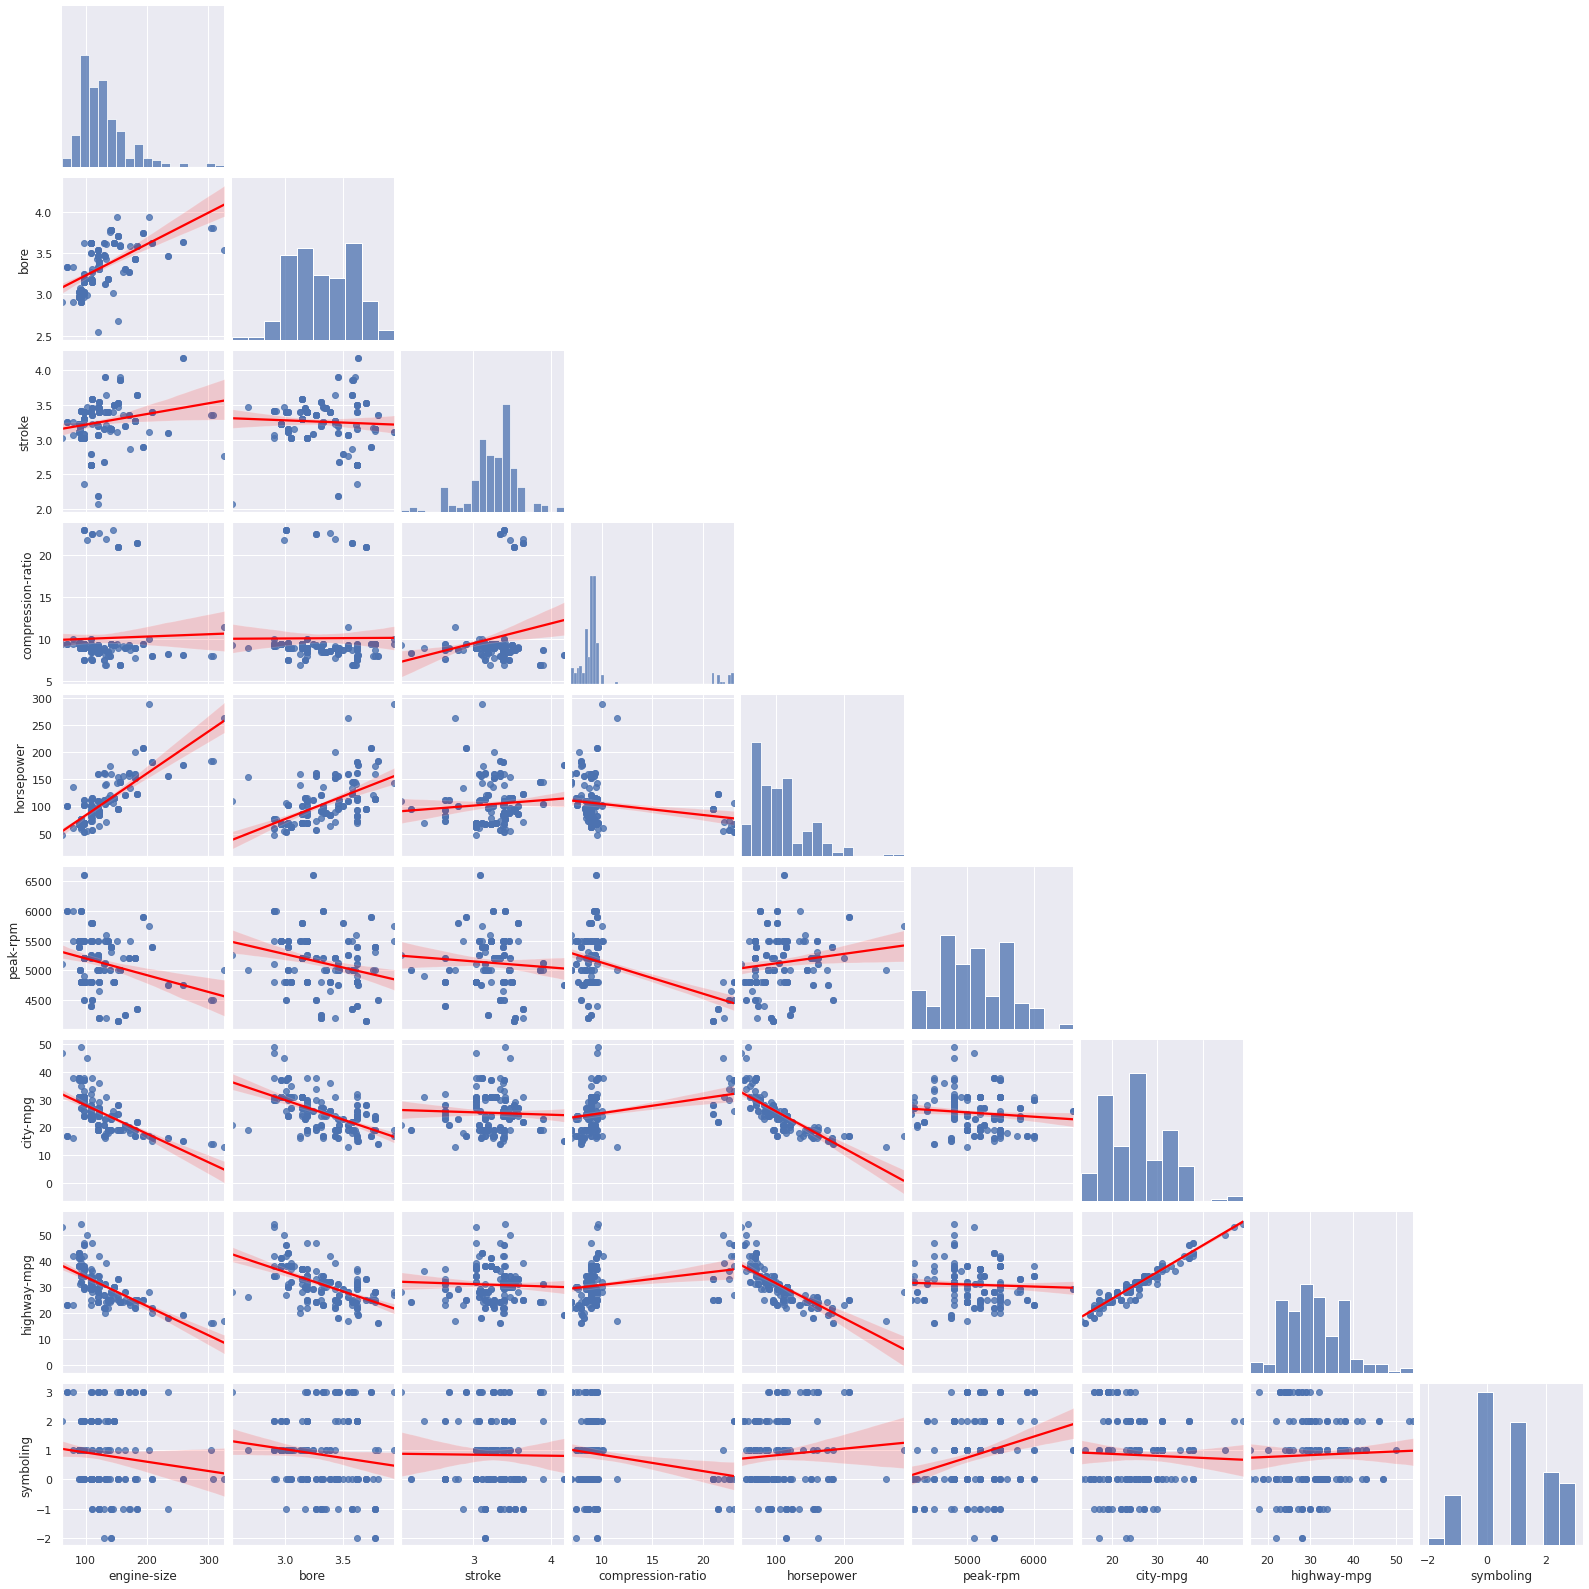

In [32]:
for_check = automobile_data[['engine-type', 'engine-size', 'fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'symboling']]

sns.pairplot(for_check, kind="reg", plot_kws={'line_kws':{'color':'red'}} , corner=True)

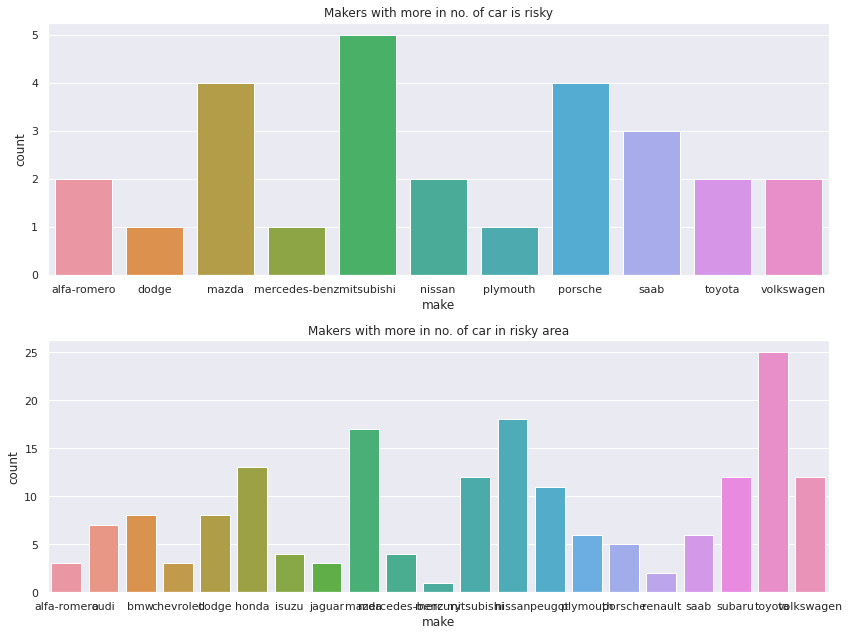

In [33]:
# risky related
fig, ax =plt.subplots(2,1)

sns.countplot(x="make",data=automobile_data[automobile_data["symboling"] == 3],ax=ax[0]).set_title("Makers with more in no. of car is risky")
sns.countplot(x="make",data=automobile_data[automobile_data["symboling"] >= 0],ax=ax[1]).set_title("Makers with more in no. of car in risky area")

fig.tight_layout()


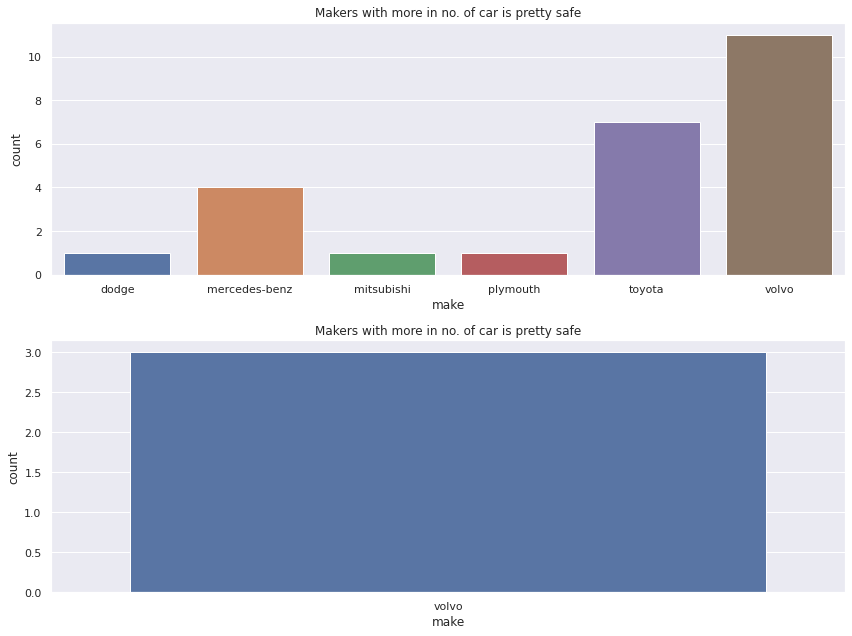

In [34]:
# safe related
fig, ax =plt.subplots(2,1)

sns.countplot(x="make",data=automobile_data[automobile_data["symboling"] < 0],ax=ax[0]).set_title("Makers with more in no. of car is pretty safe")
sns.countplot(x="make",data=automobile_data[automobile_data["symboling"] == -2],ax=ax[1]).set_title("Makers with more in no. of car is pretty safe")

fig.tight_layout()

In [35]:
noequal3 = automobile_data[automobile_data["symboling"] == 3].groupby("make")["symboling"].count()
print(noequal3)

make
alfa-romero      2
dodge            1
mazda            4
mercedes-benz    1
mitsubishi       5
nissan           2
plymouth         1
porsche          4
saab             3
toyota           2
volkswagen       2
Name: symboling, dtype: int64


In [36]:
nolargerthan0 = automobile_data[automobile_data["symboling"] > 0].groupby("make")["symboling"].count()
print(nolargerthan0)

make
alfa-romero       3
audi              6
bmw               2
chevrolet         2
dodge             8
honda             6
isuzu             2
mazda            11
mercedes-benz     2
mercury           1
mitsubishi       12
nissan           13
plymouth          6
porsche           5
renault           1
saab              6
subaru            3
toyota           15
volkswagen        9
Name: symboling, dtype: int64


In [37]:
# how many cars is the most risky (symboling==3) in no. of cars that are normal (symboling>0)
riskyratio = noequal3/nolargerthan0*100
print(riskyratio) 

make
alfa-romero      66.666667
audi                   NaN
bmw                    NaN
chevrolet              NaN
dodge            12.500000
honda                  NaN
isuzu                  NaN
mazda            36.363636
mercedes-benz    50.000000
mercury                NaN
mitsubishi       41.666667
nissan           15.384615
plymouth         16.666667
porsche          80.000000
renault                NaN
saab             50.000000
subaru                 NaN
toyota           13.333333
volkswagen       22.222222
Name: symboling, dtype: float64


In [38]:
px.scatter(automobile_data, x="price", y="symboling",color='make',title="Safety symboling by Price in Automakers")

# 3 = risky


#### Notes:

- From the above graph, we can observe that **21 out of all 22 automakers** have models with the "symboling" in the positive number range, which means its **safety level is normal-to-risky**.
- In these 21 automakers, 11 automakers manufacture car models with symboling equal to +3, which indicates that the auto is risky. 
- **80%** of auto made by Porsche is the riskiest in the number of cars that are normal-to-risky, and followed by Alfa-romero, who has a **66.7**% rate.
<br>
- For the safety of auto parts, **6 automakers have models with the "symboling" in the negative number range, which means its safety level is normal-to-safe**.
- Within these 6 automakers, it seems like **models from Volvo are the safest since these models process the highest score**, -2 in "symboling" among the dataset.
<br>

- From the px.scatter map, we can observe that models from **Porsche** at a higher price and less safe when it compares to others models.


# Conclusion and Next Steps

### Conclusion
From the above analysis, we can concluded that the **top 3 car producers are Toyota, Nissan, and Mazda**. They are **all Japanese multinational automakers**, while generally they **sell auto at lower prices**. **Toyota is the largest suppliers** in hatchback, sedan, wagon, and hardtop

If you just **wanna go for a cheaper one, you can consider having an auto from Toyota, Nissan, and Mazda**, they are the top 3 car producers and selling their auto at a lower price. If you **value Safety a lot, then Porsche will not be your first choice, maybe you can take Volvo into account.**

### Next Steps
The next steps of the dataset analysis are to **check the relationship between car performance and price**, and also **the relationship between car performance and safety performance.**
Which means, the data in column 'engine-type','num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg' will be examinted in a detailed way.
